# 1 . For the function J(w) = w^2 + (54/w), implement the following methods: (a) Use the bracketed value (that you got in the last lab) to get to the critical point employing interval halving method and (b) identify the critical point using Newton-Raphson method and (c) verify the result manually using the optimality criteria (post this write-up as well in .jpg/.png etc).

    From the lab7 part1 last question::

In [176]:
def J(w):
    return w**2 + 54/w

a = 1
b = 5
n = 5    #last lab i have taken n=1000 but for clear result now i am taking n=5

def bracketing(a,b,n):
    dw = (b-a)/n
    w1 = a
    w2 = w1 + dw
    w3 = w2 + dw
    while(w3 <= b):
        if J(w1) >= J(w2) and J(w2) <= J(w3):
            return w1,w2
            break
        else:
            w1 = w2
            w2 = w3
            w3 = w3 + dw
            

    else:
        print('The roots are at the one of the end points')

w1,w2 = bracketing(a,b,n)
print(f"The required interval where the minimum is: [{w1},{w2}]")

The required interval where the minimum is: [2.6,3.4000000000000004]


# (a)

In [177]:
a = w1
b = w2
print(f'Now the required interval(from the last lab part 1) is given by: [{a:.2f},{b: .2f}]')

def interval_halving(a,b):
    while((b-a) > 0.000001):
        mid = (a+b)/2
        if J(a) >= J(mid) <= J(b):
            return mid
        if J(a) >= J(mid):
            a = mid
        if J(b) >= J(mid):
            b = mid
            
print("The required critical point is :")
print(interval_halving(a,b))

Now the required interval(from the last lab part 1) is given by: [2.60, 3.40]
The required critical point is :
3.0


# (b)

In [178]:
def J(w):
    return w**2 + 54/w

#1st derivative
def d1J(w):
    return 2*w - 54/ (w**2)

#2nd derivative
def d2J(w):
    return 2 + 108/ (w**3)

def newton_raphson(w0):
    while(abs(d1J(w0)) >0.00001):
        #newton raphson argument update
        d1 = d1J(w0)
        d2 = d2J(w0)
        #newton raphson update
        w1 = w0 - d1 / d2
        #next iterator update
        d1 = d1J(w1)
        d2 = d2J(w1)
        w0 = w1
    return w0

initial_point = 1
print('The required minimiser of the given function is : ',newton_raphson(initial_point))

The required minimiser of the given function is :  2.999999931328473


# 2.  Plot the surface J(w1, w2) = (w1 - 10)^2 + (w2 - 10)^2. Also, generated the corresponding contour plot. Label the plots appropriately. Give a suitable title for the figure.



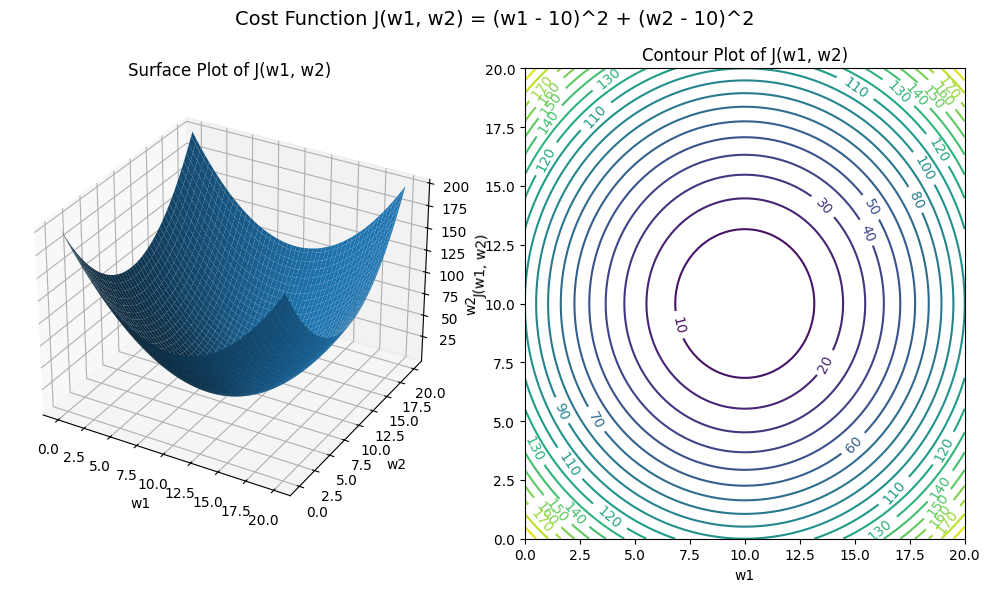

In [179]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# function J(w1, w2)
def J(w1, w2):
    return (w1 - 10)**2 + (w2 - 10)**2

# a grid of w1 and w2 values
w1 = np.linspace(0, 20, 100)
w2 = np.linspace(0, 20, 100)
W1, W2 = np.meshgrid(w1, w2)
J_val = J(W1, W2)

# the surface plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(W1, W2, J_val)
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('J(w1, w2)')
ax.set_title('Surface Plot of J(w1, w2)')

# the contour plot
ax = fig.add_subplot(122)
contour = ax.contour(W1, W2, J_vals, levels=20)
ax.clabel(contour, inline=True, fontsize=10)
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_title('Contour Plot of J(w1, w2)')

# title for the figure
plt.suptitle('Cost Function J(w1, w2) = (w1 - 10)^2 + (w2 - 10)^2', fontsize=14)

# Showing the plots
plt.tight_layout()
plt.show()


# 3. Using line (unidirectional) search, for the function (w1 - 10 )^2 + (w2 - 10)^2, find the minimum value along the direction (2, 5). You can assume the start point to be (2,1).  Plot the function and its contours along with the minimum value in that direction.



In [180]:
initial_pt = [2,1]
S = [2,5]

def J_two_var(w1, w2):
    return (w1 - 10)**2 + (w2 - 10)**2

def J(w):
    #w1 = w1 + alpha * S1
    #w2 = w2 + alpha * S2
    return (2+2*w-10)**2 + (1+5*w-10)**2

a = 0
b = 10
n = 50
w1,w2 = bracketing(a,b,n)
print(f"The required interval where the minimum is: [{w1},{w2}]")

The required interval where the minimum is: [1.9999999999999998,2.1999999999999997]


In [181]:
a = w1
b = w2
print(f'Now the required interval is given by: [{a:.2f},{b: .2f}]')

print("The required critical(for alpha) point is :")
print(interval_halving(a,b))

Now the required interval is given by: [2.00, 2.20]
The required critical(for alpha) point is :
2.0999999999999996


In [182]:
end = [2+2.099*2,1+2.099*5]
print('The minimum value of the function: ',J_two_var(end[0],end[1]))

The minimum value of the function:  16.690229


In [183]:
w1_val = np.linspace(0, 20, 100)
w2_val = np.linspace(0, 20, 100)
W1, W2 = np.meshgrid(w1_val, w2_val)
J_val = J_two_var(W1, W2)

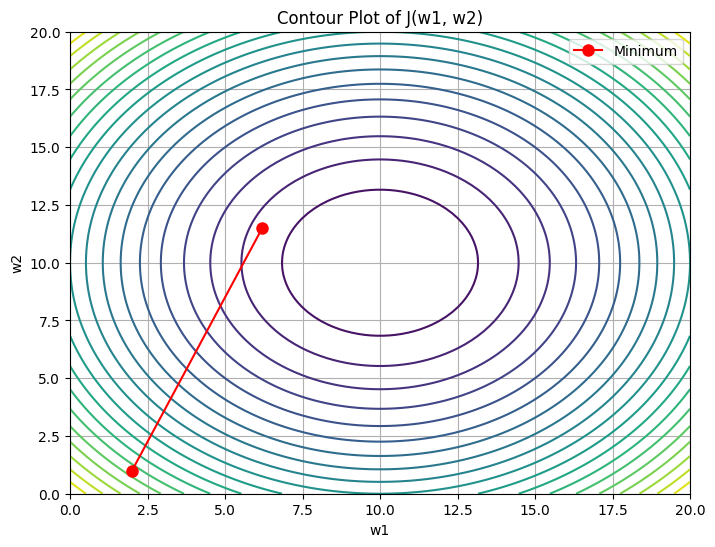

In [184]:
# Plotting the contour plot
plt.figure(figsize=(8, 6))
plt.contour(W1, W2, J_vals, levels=20)
plt.plot([initial_pt[0],end[0]],[initial_pt[1],end[1]], marker='o', color='red', markersize=8, label='Minimum')
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('Contour Plot of J(w1, w2)')
plt.legend()
plt.grid(True)
plt.show()